In [50]:
import pandas as pd

In [51]:
df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [52]:
Q1, Q3 = df.height.quantile([0.25, 0.75])
Q1, Q3

(5.3500000000000005, 6.275)

In [53]:
IQR = Q3 - Q1
IQR

0.9249999999999998

In [54]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower, upper

(3.962500000000001, 7.6625)

In [55]:
df[(df.height < lower) | (df.height > upper)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [56]:
df_new = df[(df.height > lower) & (df.height < upper)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


In [57]:
df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [58]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [59]:
df_apac = df[df.Region == "APAC"]
df_europe = df[df.Region == "Europe"]
df_americas = df[df.Region == "Americas"]

In [66]:
def get_lower_upper(data):
    Q1, Q3 = data.Sales.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [67]:
lower, upper = get_lower_upper(df_apac)
lower, upper

(-737.125, 59747.875)

In [68]:
df_apac.Sales.describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [69]:
lower, upper = get_lower_upper(df_europe)
lower, upper

(7306.875, 17665.875)

In [64]:
df_europe.Sales.describe()

count       12.000000
mean     13147.583333
std       3549.568795
min       9665.000000
25%      11191.500000
50%      12044.000000
75%      13781.250000
max      23000.000000
Name: Sales, dtype: float64

In [70]:
df_europe[df_europe.Sales>upper]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [71]:
lower, upper = get_lower_upper(df_americas)
lower, upper

(16832.375, 38473.375)

In [72]:
df_americas.Sales.describe()

count       12.000000
mean     28356.750000
std       3610.368556
min      23407.000000
25%      24947.750000
50%      28770.500000
75%      30358.000000
max      34102.000000
Name: Sales, dtype: float64

In [73]:
labels=df["Region"].unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [74]:
plot_data=[df["Sales"][df["Region"]==label]for label in labels]
plot_data

[0     36750
 1     36995
 2     18579
 3     37768
 4     23956
 5     38143
 6     29132
 7     21961
 8     33299
 9     37279
 10    21388
 11    21896
 Name: Sales, dtype: int64,
 12     9665
 13    10297
 14    11079
 15    13410
 16    11229
 17    15352
 18    13286
 19    11470
 20    11873
 21    23000
 22    12215
 23    14895
 Name: Sales, dtype: int64,
 24    30247
 25    29284
 26    27904
 27    23407
 28    23716
 29    25077
 30    33649
 31    24560
 32    34102
 33    28257
 34    30691
 35    29387
 Name: Sales, dtype: int64]

/tmp/ipykernel_270480/1069575187.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data,labels=labels,vert=True, patch_artist = True)


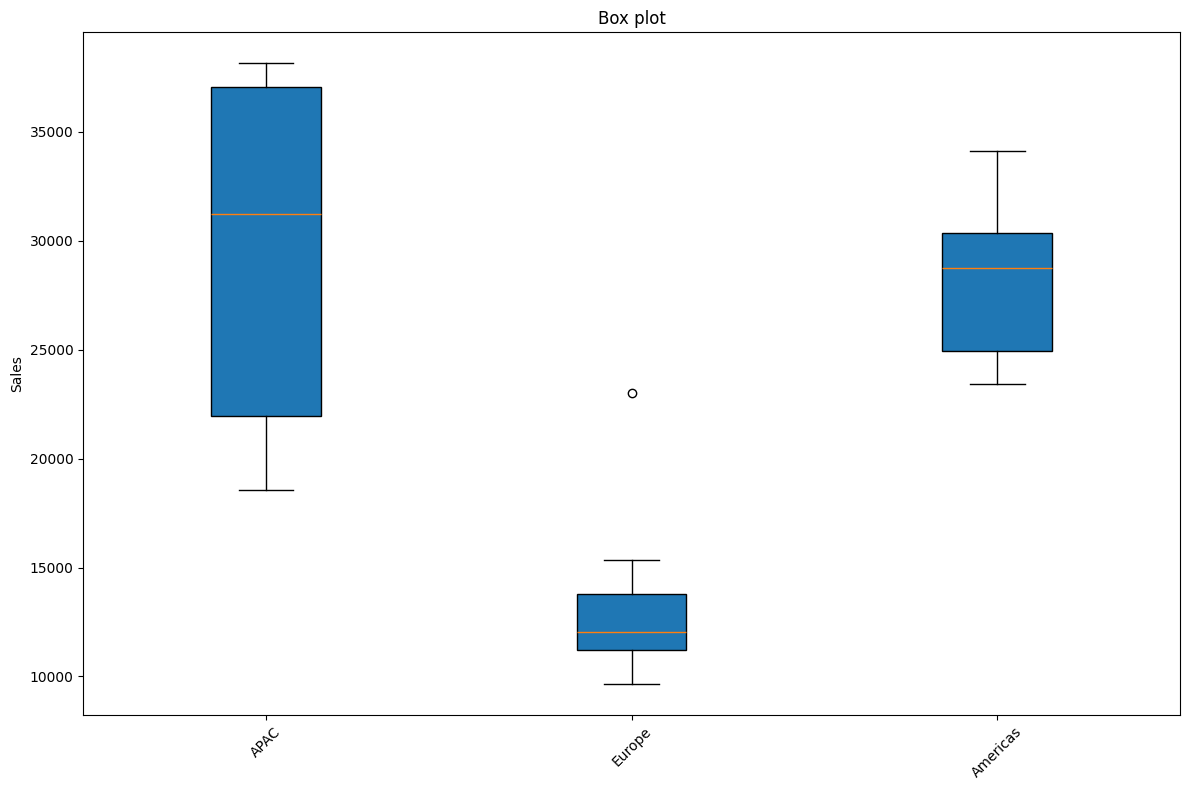

In [76]:
plt.figure(figsize=(12,8))
plt.boxplot(plot_data,labels=labels,vert=True, patch_artist = True)
plt.title("Box plot")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()